# SNN_Clustering

In [2]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import scipy
%matplotlib inline

from lib import audio_methods
from lib import formatter
from lib.snn_clustering import SNN

from sklearn.decomposition import PCA

train_pca = pd.read_csv("./data_frames/train_pca.csv",usecols=range(1,6))
train_pca

,PC1,PC2,PC3,PC4,PC5
0,-1.754399,1.751019,-0.783098,-0.632242,0.484527
1,-2.335371,0.748540,-0.088715,-0.561861,0.747871
2,-1.263251,1.192971,-0.063963,-0.033535,0.070880
3,-1.310766,2.241533,-0.588520,-0.055770,0.299381
4,-1.248747,1.315912,0.014555,1.098989,0.224060
...,...,...,...,...,...
34437,2.563398,1.719664,-0.135926,0.456149,-0.530828
34438,-0.429961,0.091013,0.434390,1.106230,-0.699905
34439,0.712204,-0.027652,0.560340,-0.316136,-0.141787
34440,2.229300,0.298581,0.460838,-0.536680,-0.797634


# SNN Clustering

In [19]:
train_sample = train_pca.sample(10000)
train_temp = scipy.sparse.csr_matrix(train_sample).todense()

snn = SNN(80,0.5)
result = snn.fit_predict(train_temp)
labs = result.astype(int)
train_sample['label05'] = labs

snn = SNN(80,0.6)
result = snn.fit_predict(train_temp)
labs = result.astype(int)
train_sample['label06'] = labs

snn = SNN(80,0.7)
result = snn.fit_predict(train_temp)
labs = result.astype(int)
train_sample['label07'] = labs

snn = SNN(80,0.8)
result = snn.fit_predict(train_temp)
labs = result.astype(int)
train_sample['label08'] = labs

In [20]:
train_sample

,PC1,PC2,PC3,PC4,PC5,label05,label06,label07,label08
20657,-0.542728,-1.266990,-0.405336,0.176771,-0.776370,-1,-1,-1,-1
20259,-2.552916,-0.054820,-1.055507,-1.259764,0.402044,-1,-1,-1,-1
33870,-1.347275,1.247331,-1.101422,-0.498793,0.404419,3,-1,-1,-1
13505,-2.924409,0.695237,1.646601,-0.693525,0.383967,-1,-1,-1,-1
23193,-1.255219,-1.129457,-0.987960,-1.294810,0.005876,8,-1,-1,-1
...,...,...,...,...,...,...,...,...,...
8114,-0.097090,0.549113,1.457802,2.852487,0.414144,-1,-1,-1,-1
6695,1.786587,-1.397480,0.570928,-1.819469,-0.643321,0,12,-1,-1
7919,1.538631,1.808310,-0.559752,-0.004263,-0.432858,-1,-1,-1,-1
13105,1.767012,1.228555,-0.576212,-0.325702,-0.227797,-1,-1,-1,-1


In [27]:
train_sample

,PC1,PC2,PC3,PC4,PC5,label05,label06,label07,label08
20657,-0.542728,-1.266990,-0.405336,0.176771,-0.776370,-1,-1,-1,-1
20259,-2.552916,-0.054820,-1.055507,-1.259764,0.402044,-1,-1,-1,-1
33870,-1.347275,1.247331,-1.101422,-0.498793,0.404419,3,-1,-1,-1
13505,-2.924409,0.695237,1.646601,-0.693525,0.383967,-1,-1,-1,-1
23193,-1.255219,-1.129457,-0.987960,-1.294810,0.005876,8,-1,-1,-1
...,...,...,...,...,...,...,...,...,...
8114,-0.097090,0.549113,1.457802,2.852487,0.414144,-1,-1,-1,-1
6695,1.786587,-1.397480,0.570928,-1.819469,-0.643321,0,12,-1,-1
7919,1.538631,1.808310,-0.559752,-0.004263,-0.432858,-1,-1,-1,-1
13105,1.767012,1.228555,-0.576212,-0.325702,-0.227797,-1,-1,-1,-1


# Cluster visualizations

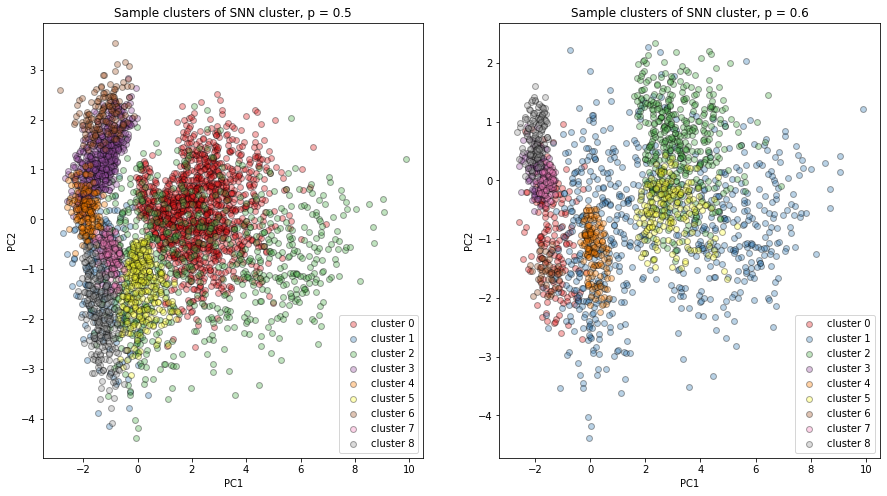

In [22]:
#https://colorbrewer2.org/?type=qualitative&scheme=Set1&n=9
cols = ['#e41a1c','#377eb8','#4daf4a','#984ea3','#ff7f00','#ffff33','#a65628','#f781bf','#999999']

plt.figure(figsize=(15,8))
plt.subplot(1,2,1)
for i in range(0,9):
    plt.scatter(
        train_sample[(train_sample['label05'] == i)]['PC1'], 
        train_sample[(train_sample['label05'] == i)]['PC2'],
        s=35, c=cols[i],
        marker='o', edgecolor='black',
        label='cluster '+str(i),
        alpha=0.35
    )

plt.title("Sample clusters of SNN cluster, p = 0.5")
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.legend(scatterpoints=1)

plt.subplot(1,2,2)
for i in range(0,9):
    plt.scatter(
        train_sample[(train_sample['label06'] == i)]['PC1'], 
        train_sample[(train_sample['label06'] == i)]['PC2'],
        s=35, c=cols[i],
        marker='o', edgecolor='black',
        label='cluster '+str(i),
        alpha=0.35
    )

plt.title("Sample clusters of SNN cluster, p = 0.6")
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.legend(scatterpoints=1)

plt.show()

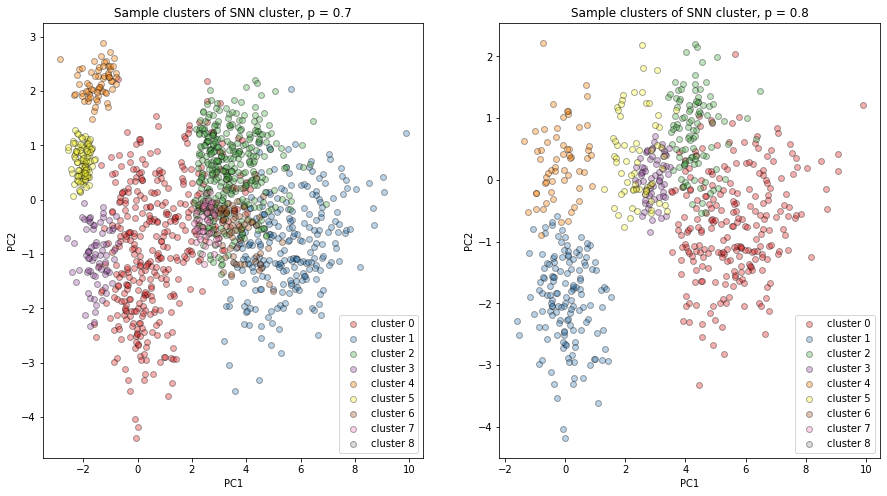

In [23]:
plt.figure(figsize=(15,8))
plt.subplot(1,2,1)
for i in range(0,9):
    plt.scatter(
        train_sample[(train_sample['label07'] == i)]['PC1'], 
        train_sample[(train_sample['label07'] == i)]['PC2'],
        s=35, c=cols[i],
        marker='o', edgecolor='black',
        label='cluster '+str(i),
        alpha=0.35
    )

plt.title("Sample clusters of SNN cluster, p = 0.7")
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.legend(scatterpoints=1)

plt.subplot(1,2,2)
for i in range(0,9):
    plt.scatter(
        train_sample[(train_sample['label08'] == i)]['PC1'], 
        train_sample[(train_sample['label08'] == i)]['PC2'],
        s=35, c=cols[i],
        marker='o', edgecolor='black',
        label='cluster '+str(i),
        alpha=0.35
    )

plt.title("Sample clusters of SNN cluster, p = 0.8")
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.legend(scatterpoints=1)

plt.show()

# Cluster size visualizations

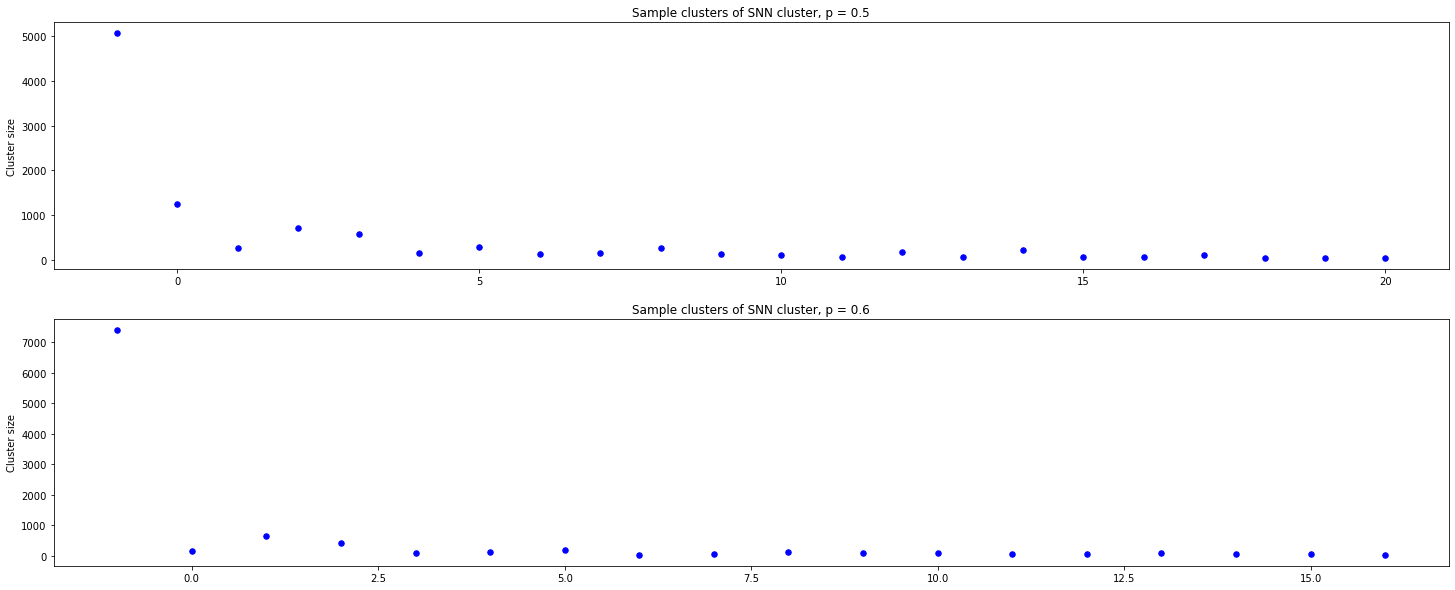

In [29]:
lab05 = pd.unique(train_sample.label05); lab05.sort()
lab06 = pd.unique(train_sample.label06); lab06.sort()
lab07 = pd.unique(train_sample.label07); lab07.sort()
lab08 = pd.unique(train_sample.label08); lab08.sort()
sizes05 = []; sizes06 = []; sizes07 = []; sizes08 = []

for e in lab05:
    sizes05.append(len(train_sample[train_sample.label05==e]))
for e in lab06:
    sizes06.append(len(train_sample[train_sample.label06==e]))
for e in lab07:
    sizes07.append(len(train_sample[train_sample.label07==e]))
for e in lab08:
    sizes08.append(len(train_sample[train_sample.label08==e]))

plt.figure(figsize=(25,10))
plt.subplot(2,1,1)
plt.scatter(lab05, sizes05, s=30, c='b', marker="o", label='Quantile 0.05')

plt.ylabel("Cluster size")
plt.title("Sample clusters of SNN cluster, p = 0.5")

plt.subplot(2,1,2)
plt.scatter(lab06, sizes06, s=30, c='b', marker="o", label='Quantile 0.01')

plt.ylabel("Cluster size")
plt.title("Sample clusters of SNN cluster, p = 0.6")

plt.show()

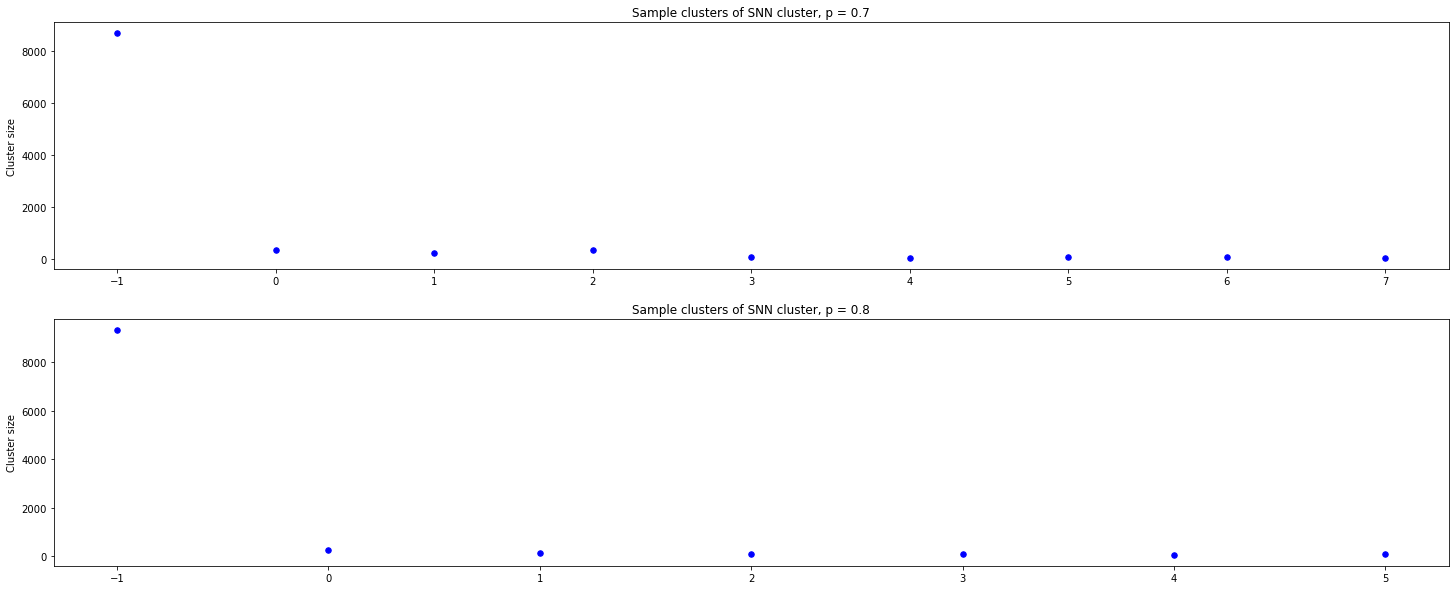

In [30]:
plt.figure(figsize=(25,10))
plt.subplot(2,1,1)
plt.scatter(lab07, sizes07, s=30, c='b', marker="o", label='Quantile 0.05')

plt.ylabel("Cluster size")
plt.title("Sample clusters of SNN cluster, p = 0.7")

plt.subplot(2,1,2)
plt.scatter(lab08, sizes08, s=30, c='b', marker="o", label='Quantile 0.01')

plt.ylabel("Cluster size")
plt.title("Sample clusters of SNN cluster, p = 0.8")

plt.show()

# Evaluation of Cohesion / Separation

In [32]:
from sklearn.metrics import silhouette_score

X = train_sample[['PC1','PC2','PC3','PC4','PC5']]
print("05:",silhouette_score(X, train_sample['label05']))
print("06:",silhouette_score(X, train_sample['label06']))
print("07:",silhouette_score(X, train_sample['label07']))
print("08:",silhouette_score(X, train_sample['label08']))

05: -0.18896735613668617
06: -0.2865583244127694
07: -0.1721573386477362
08: 0.12162254904974773
